#  Dataset: House Prices - Advanced Regression Techniques

---

##  Objetivo del dataset
- **Meta principal**: **Predecir el precio de venta de una casa (`SalePrice`)** en la ciudad de Ames (Iowa, EE.UU.).
- **Cómo se logra**: mediante modelos de **regresión múltiple** u otros algoritmos de Machine Learning, usando como insumo las características de la casa (tamaño, materiales, condiciones, ubicación, etc.).

---

##  Pasos para llegar al objetivo
1. **Comprensión del problema**  
   - Variable dependiente: `SalePrice`.
   - Variables independientes: características estructurales, de ubicación, materiales y extras.

2. **Exploración de los datos (EDA)**  
   - Revisar registros, valores nulos, tipos de datos.
   - Generar estadísticas descriptivas y distribuciones.

3. **Limpieza de datos**  
   - Imputar o eliminar valores faltantes (`NA`).
   - Tratar valores atípicos.
   - Agrupar categorías poco frecuentes.

4. **Codificación de variables categóricas**  
   - Usar *One Hot Encoding* o *Label Encoding*.

5. **Escalamiento / Normalización**  
   - Aplicar sobre variables numéricas cuando el modelo lo requiera.

6. **Selección de variables relevantes**  
   - Usar correlaciones, ANOVA o técnicas de *feature selection*.

7. **Construcción del modelo**  
   - Empezar con **Regresión Lineal Múltiple**.
  

8. **Evaluación del modelo**  
- **RMSE (Root Mean Squared Error):** mide el error promedio, penaliza más los errores grandes.  
- **MAE (Mean Absolute Error):** error promedio absoluto entre lo real y lo predicho.  
- **R² (Coeficiente de determinación):** indica qué tan bien el modelo explica la variabilidad (0 a 1).  
- **Validación cruzada:** divide los datos en partes para entrenar y probar el modelo de forma más robusta.  


9. **Interpretación de resultados**  
   - Identificar qué variables influyen más en el precio de venta.

---

##  Resumen de variables principales
El dataset contiene **79 variables**. Algunos ejemplos clave:

- **Lote**
  - `MSSubClass`: tipo de vivienda (1 piso, 2 pisos, dúplex, PUD).  
  - `MSZoning`: zonificación (residencial, comercial, agrícola).  
  - `LotFrontage`: longitud de fachada.  
  - `LotArea`: área del terreno.  
  - `LotShape`: forma del lote (regular, irregular).  
  - `LandContour`: topografía (plano, pendiente, depresión).  
  - `Neighborhood`: barrio donde se ubica la casa.  

- **Construcción**
  - `BldgType`: tipo de construcción (unifamiliar, dúplex, townhouse).  
  - `HouseStyle`: estilo (1 piso, 2 pisos, split-level).  
  - `OverallQual`: calidad general (1 = muy mala, 10 = excelente).  
  - `OverallCond`: estado general de la vivienda.  
  - `YearBuilt`: año de construcción.  
  - `YearRemodAdd`: año de remodelación.  
  - `RoofStyle` / `RoofMatl`: tipo y material del techo.  
  - `Exterior1st` / `Exterior2nd`: material exterior.  

- **Sótano**
  - `BsmtQual`, `BsmtCond`: calidad y estado del sótano.  
  - `BsmtExposure`: exposición (ventanas, walkout).  
  - `TotalBsmtSF`: área total del sótano.  

- **Habitabilidad**
  - `GrLivArea`: área habitable sobre el nivel del suelo.  
  - `FullBath`, `HalfBath`: baños.  
  - `Bedroom`, `Kitchen`: habitaciones y cocinas.  
  - `TotRmsAbvGrd`: total de cuartos.  

- **Extras**
  - `Fireplaces`, `FireplaceQu`: chimeneas.  
  - `GarageType`, `GarageCars`, `GarageArea`: características del garaje.  
  - `WoodDeckSF`, `OpenPorchSF`, `PoolArea`, `Fence`: áreas exteriores y amenidades.  

- **Venta**
  - `MoSold`, `YrSold`: mes y año de venta.  
  - `SaleType`: tipo de venta (convencional, cash, VA loan).  
  - `SaleCondition`: condiciones de la venta (normal, familiar, parcial, etc.).  

- **Target**
  - `SalePrice`: precio de venta de la vivienda (variable a predecir).

---

##  En resumen
El dataset busca **explicar y predecir el precio de las casas** usando información estructural, de ubicación, calidad de materiales, extras y condiciones de venta.


In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
target = 'SalePrice'

In [52]:

print("Dimensiones de train:", train.shape)
print(f"Train: \nFilas: {train.shape[0]} | Columnas: {train.shape[1]}")
print("Dimensiones de test:", test.shape)
print(f"Test: \nFilas: {test.shape[0]} | Columnas: {test.shape[1]}")

print("Antes de la limpieza:")
print("Nulos en train:", train.isnull().sum().sum())
print("Nulos en test:", test.isnull().sum().sum())

for col in train.columns:
    if train[col].dtype == "object":  
        train[col] = train[col].fillna(train[col].mode()[0])
    else: 
        train[col] = train[col].fillna(train[col].mean())

for col in test.columns:
    if test[col].dtype == "object":
        test[col] = test[col].fillna(test[col].mode()[0])
    else:
        test[col] = test[col].fillna(test[col].mean())
        
print("Después de la imputación:")
print("Nulos en train:", train.isnull().sum().sum())
print("Nulos en test:", test.isnull().sum().sum())

Dimensiones de train: (1460, 81)
Train: 
Filas: 1460 | Columnas: 81
Dimensiones de test: (1459, 80)
Test: 
Filas: 1459 | Columnas: 80
Antes de la limpieza:
Nulos en train: 7829
Nulos en test: 7878
Después de la imputación:
Nulos en train: 0
Nulos en test: 0


In [53]:
cat_features = train.select_dtypes(include=["object"]).columns.tolist() 
num_features = train.select_dtypes(exclude=["object"]).columns.drop(target).tolist()

print("Columnas textuales:", cat_features)
print("Columnas numéricas:", num_features)  

preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_features),
    ('scaler', StandardScaler(), num_features)
])


Columnas textuales: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Columnas numéricas: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'Gar

In [54]:
X = train.select_dtypes(exclude=["object"]).drop(columns=["SalePrice"])
y = train["SalePrice"]

selector = SelectKBest(score_func=f_regression, k=15)
selector.fit(X, y)

top_features = X.columns[selector.get_support()]
print("🔝 15 variables más influyentes según ANOVA F-test:")
print(list(top_features))

🔝 15 variables más influyentes según ANOVA F-test:
['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea']


C:\Users\User\AppData\Local\Temp\ipykernel_13812\2466272094.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.head(15).values[1:], y=corr.head(15).index[1:], palette='viridis')


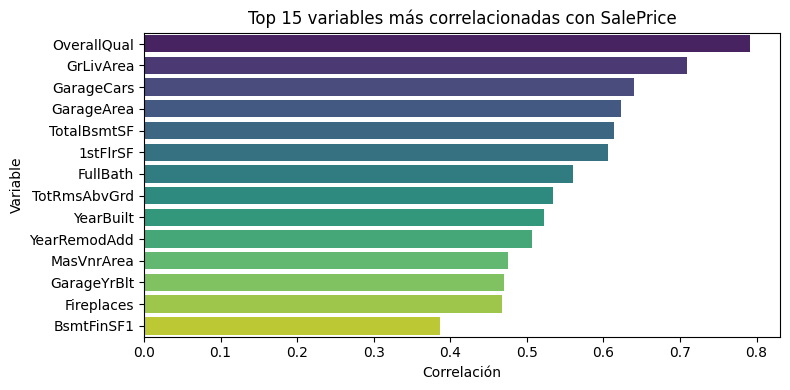

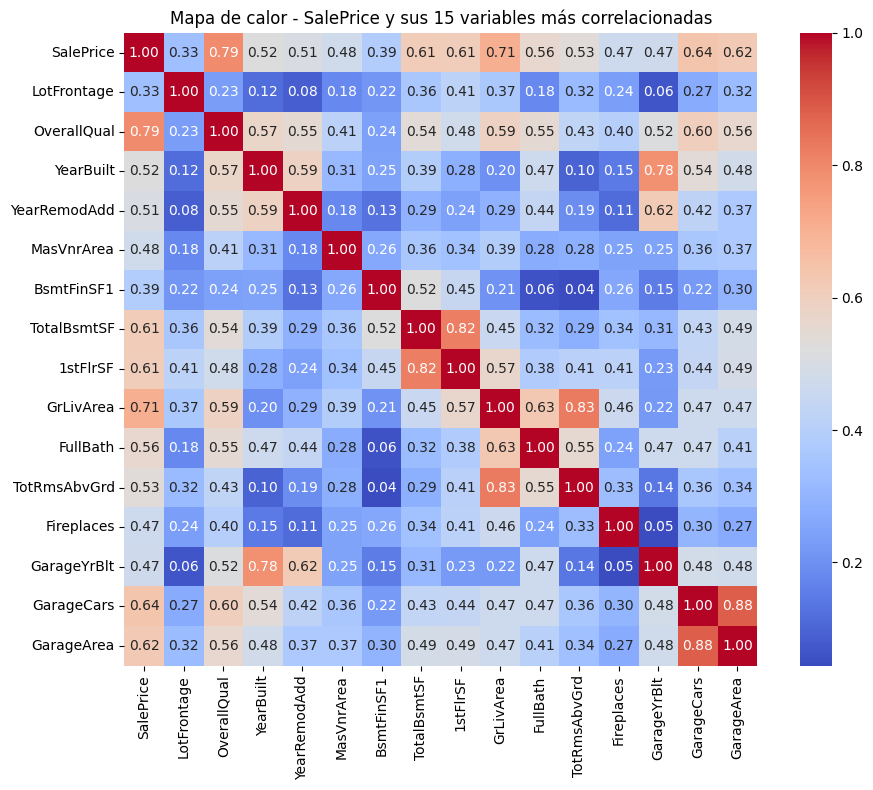

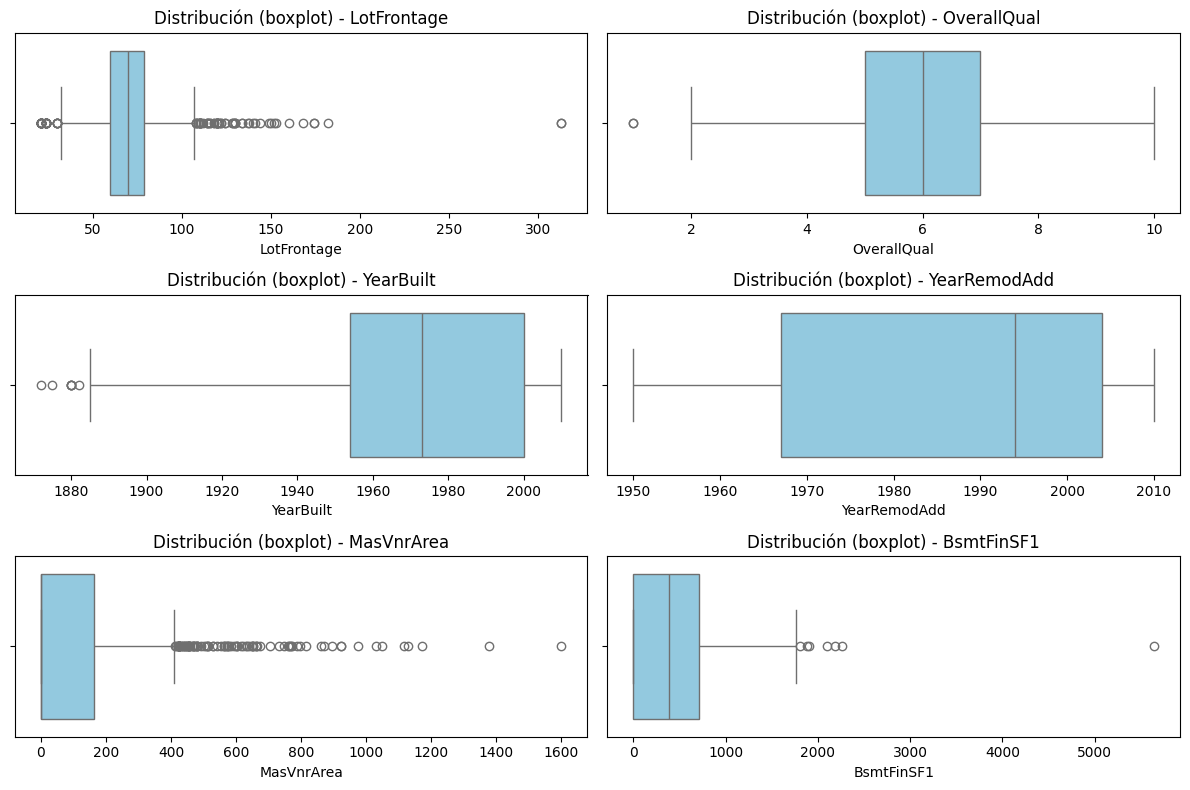

In [55]:
plt.figure(figsize=(8,4))
sns.barplot(x=corr.head(15).values[1:], y=corr.head(15).index[1:], palette='viridis')
plt.title("Top 15 variables más correlacionadas con SalePrice")
plt.xlabel("Correlación")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

vars_heatmap = ["SalePrice"] + list(top_features)
plt.figure(figsize=(10,8))
sns.heatmap(train[vars_heatmap].corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Mapa de calor - SalePrice y sus 15 variables más correlacionadas")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,8))
for i, col in enumerate(top_features[:6], 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=train[col], color='skyblue')
    plt.title(f"Distribución (boxplot) - {col}")
plt.tight_layout()
plt.show()

In [ ]:
X = train[top_features] 
y = train["SalePrice"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_pred)):.2f}") 
print(f"MAE: {mean_absolute_error(y_val, y_pred):.2f}") 
print(f"R²: {r2_score(y_val, y_pred):.3f}")


RMSE: 38062.70
MAE: 24399.12
R²: 0.811


In [57]:
predicciones = model.predict(X_test)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [60]:
#salida 
import pandas as pd

# Crear los datos
data = {
    "Id": test["Id"],
    "SalePrice": predicciones
}

# Convertir a DataFrame
df = pd.DataFrame(data)

# Guardar en to_csv
df.to_csv("predicciones.csv", index=False)


print("Archivo 'predicciones.xlsx' generado con éxito ✅")

Archivo 'predicciones.xlsx' generado con éxito ✅
